# Matrices

In [1]:
import numpy as np
import sympy as sy
import math
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as patches
from matplotlib import animation
%matplotlib inline

Consider again our apples and bananas example:
$$2a + 3b = 8$$
$$10a + 1b = 13$$
Written in matrix form:
$\begin{bmatrix} 2 & 3\\ 10 & 1\end{bmatrix}$ 
$\begin{bmatrix} a\\ b\end{bmatrix}$ = 
$\begin{bmatrix} 8\\ 13\end{bmatrix}$ 
<p>
Let's zoom in on what this matrix really means:
$\begin{bmatrix} 2 & 3\\ 10 & 1\end{bmatrix}$ 
$\begin{bmatrix} 1\\ 0\end{bmatrix}$ = 
$\begin{bmatrix} 2\\ 10\end{bmatrix}$
Let's zoom in on what this matrix really means:
$\begin{bmatrix} 2 & 3\\ 10 & 1\end{bmatrix}$ 
$\begin{bmatrix} 0\\ 1\end{bmatrix}$ = 
$\begin{bmatrix} 3\\ 1\end{bmatrix}$

In [2]:
ehat1 = np.array([1., 0.])
ehat2 = np.array([0., 1.])
eprime1 = np.array([2., 10.])
eprime2 = np.array([3., 1.])

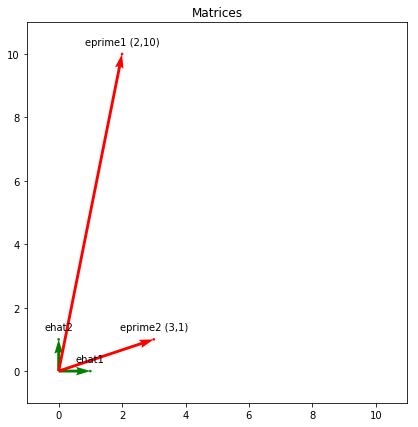

In [3]:
plt.figure(figsize=(7,7))

ax = plt.gca()
ax.set_xlim([-1,11])
ax.set_ylim([-1,11])
ax.set_aspect('equal')

ehat1_quiver = ax.quiver(0, 0, ehat1[0], ehat1[1], angles='xy', scale_units='xy', scale=1, color='g')
ax.quiverkey(ehat1_quiver, ehat1[0], ehat1[1], 0, 'ehat1', coordinates='data')

ehat2_quiver = ax.quiver(0, 0, ehat2[0], ehat2[1], angles='xy', scale_units='xy', scale=1, color='g')
ax.quiverkey(ehat2_quiver, ehat2[0], ehat2[1], 0, 'ehat2', coordinates='data')

eprime1_quiver = ax.quiver(0, 0, eprime1[0], eprime1[1], angles='xy', scale_units='xy', scale=1, color='r')
ax.quiverkey(eprime1_quiver, eprime1[0], eprime1[1], 0, 'eprime1 (2,10)', coordinates='data')

eprime2_quiver = ax.quiver(0, 0, eprime2[0], eprime2[1], angles='xy', scale_units='xy', scale=1, color='r')
ax.quiverkey(eprime1_quiver, eprime2[0], eprime2[1], 0, 'eprime2 (3,1)', coordinates='data')

plt.title('Matrices')
plt.show()

It turns that the key to solving simultaneous equation problems is appreciating how vectors are transformed by matrices, which is the heart of linear algebra. 

In [4]:
A = np.array([[2., 3.],
              [10., 1.]])
rprime = np.array([[8.], [13.]])
A_inv = np.linalg.inv(A)
r = np.dot(A_inv, rprime)

We will show that the vector sum rules still work:
If $$Ar = r'$$
Then $$ A(nr) = nr'$$
With n being a scalar

Also:
$$ A(r+s) = Ar = As$$
With s being another vector shaped like r

In [5]:
n = 6.7

In [6]:
np.round(np.dot(A, n*r), 10) == np.round(n*rprime, 10)

array([[ True],
       [ True]], dtype=bool)

In [7]:
s = np.random.randint(0, 10, size=(2, 1))

In [8]:
test1 = np.round(np.dot(A, (r + s)), 10)
test2 = np.round(np.dot(A, r) + np.dot(A, s), 10)
test1 == test2

array([[ True],
       [ True]], dtype=bool)

In [9]:
test1 = np.round(np.dot(A, (ehat1 + ehat2)), 10)
test2 = np.round(np.dot(A, ehat1) + np.dot(A, ehat2), 10)
test1 == test2

array([ True,  True], dtype=bool)

In [10]:
test = np.array([[3], [2]])
np.dot(A, test)

array([[ 12.],
       [ 32.]])

In [11]:
np.dot(A, 3*ehat1 + 2*ehat2)

array([ 12.,  32.])

In [12]:
3*np.dot(A, ehat1) + 2*np.dot(A, ehat2)

array([ 12.,  32.])

Summary: We can think of a matrix multiplication as just being the multiplication of the vector sum of the transformed basis vectors. 

## Types of matrix transformation

### The matrix that does not change anything

The identity matrix is the matrix which does not change anything to the matrix when performing a dot product.

$\begin{bmatrix} 1 & 0 & ... & 0 
              \\ 0 & 1 & ... & 0
              \\ 0 & 0 & ... & 0
              \\ 0 & 0 & ... & 1\end{bmatrix}$ 
$\begin{bmatrix} x\\ y \\...\\ z\end{bmatrix}$ = 
$\begin{bmatrix} x\\ y \\...\\ x\end{bmatrix}$

In [13]:
I = np.identity(2)
I

array([[ 1.,  0.],
       [ 0.,  1.]])

In [14]:
A = np.random.randint(0, 10, size=(2, 1))
print A
print np.dot(I, A)

[[9]
 [6]]
[[ 9.]
 [ 6.]]


### Stretching

$\begin{bmatrix} n_1 & 0 & ... & 0 
              \\ 0 & n_2 & ... & 0
              \\ 0 & 0 & ... & 0
              \\ 0 & 0 & ... & n_m\end{bmatrix}$ 
$\begin{bmatrix} x\\ y \\...\\ z\end{bmatrix}$ = 
$\begin{bmatrix} n_1x\\ n_2y \\...\\ n_mx\end{bmatrix}$

In [15]:
ehat = np.array([[1., 0.],
                [0., 1.]])
S = np.zeros((2, 2))
row,col = np.diag_indices(S.shape[0])
S[row,col] = np.random.randint(2, 10, size=(1, S.shape[0]))

In [16]:
S

array([[ 3.,  0.],
       [ 0.,  3.]])

In [17]:
ehat_stretched = np.dot(S, ehat)
ehat_stretched

array([[ 3.,  0.],
       [ 0.,  3.]])

In [18]:
def add_quiver(x, y, name, color, width=0.005, labelpos='N'):
    quiver = ax.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color=color, width=width)
    quiver_key = ax.quiverkey(quiver, x, y, 0, name, coordinates='data', labelpos=labelpos)
    return quiver, quiver_key

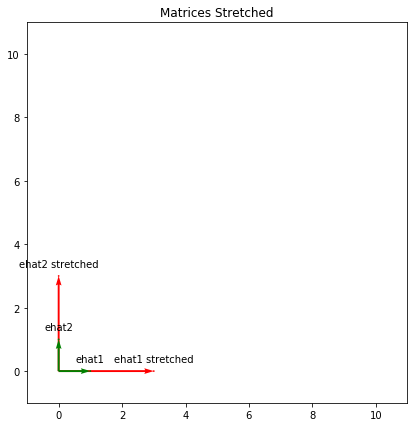

In [19]:
plt.figure(figsize=(7,7))

ax = plt.gca()
ax.set_xlim([-1,11])
ax.set_ylim([-1,11])
ax.set_aspect('equal')

add_quiver(ehat_stretched[0, 0], ehat_stretched[0, 1], 'ehat1 stretched', 'r')
add_quiver(ehat_stretched[1, 0], ehat_stretched[1, 1], 'ehat2 stretched', 'r')
add_quiver(ehat[0, 0], ehat[0, 1], 'ehat1', 'g')
add_quiver(ehat[1, 0], ehat[1, 1], 'ehat2', 'g')

plt.title('Matrices Stretched')
plt.show()

### Inverting

$\begin{bmatrix} -1 & 0 & ... & 0 
              \\ 0 & -1 & ... & 0
              \\ 0 & 0 & ... & 0
              \\ 0 & 0 & ... & -1\end{bmatrix}$ 

In [20]:
ehat = np.array([[1., 0.],
                [0., 1.]])
S = np.zeros((2, 2))
np.fill_diagonal(S, -1)

In [21]:
S

array([[-1.,  0.],
       [ 0., -1.]])

In [22]:
ehat_inverted = np.dot(S, ehat)
ehat_inverted

array([[-1.,  0.],
       [ 0., -1.]])

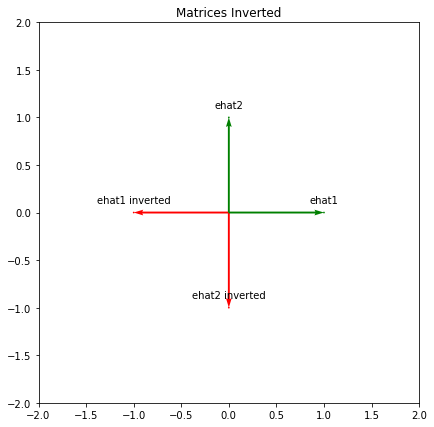

In [23]:
plt.figure(figsize=(7,7))

ax = plt.gca()
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_aspect('equal')

add_quiver(ehat_inverted[0, 0], ehat_inverted[0, 1], 'ehat1 inverted', 'r')
add_quiver(ehat_inverted[1, 0], ehat_inverted[1, 1], 'ehat2 inverted', 'r')
add_quiver(ehat[0, 0], ehat[0, 1], 'ehat1', 'g')
add_quiver(ehat[1, 0], ehat[1, 1], 'ehat2', 'g')

plt.title('Matrices Inverted')
plt.show()

### Mirroring

In [24]:
ehat = np.array([[1., 0.],
                [0., 1.]])
S = np.identity(2)
S = np.flip(S, axis=1)

In [25]:
S

array([[ 0.,  1.],
       [ 1.,  0.]])

In [26]:
ehat_mirrored = np.dot(S, ehat)
ehat_mirrored

array([[ 0.,  1.],
       [ 1.,  0.]])

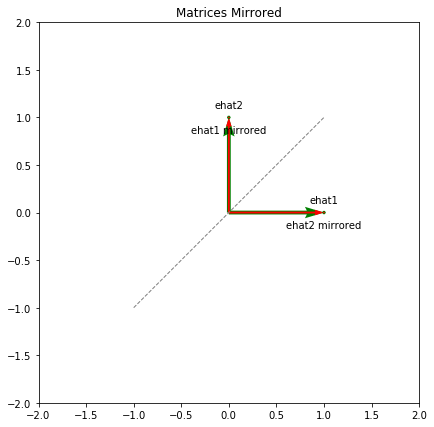

In [27]:
plt.figure(figsize=(7,7))

ax = plt.gca()
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_aspect('equal')

add_quiver(ehat[0, 0], ehat[0, 1], 'ehat1', 'g', width=0.01)
add_quiver(ehat[1, 0], ehat[1, 1], 'ehat2', 'g', width=0.01)
add_quiver(ehat_mirrored[0, 0], ehat_mirrored[0, 1], 'ehat1 mirrored', 'r', labelpos='S')
add_quiver(ehat_mirrored[1, 0], ehat_mirrored[1, 1], 'ehat2 mirrored', 'r', labelpos='S')

line = Line2D([-1, 1], [-1, 1], linewidth=1, linestyle = "--", color="grey")
ax.add_line(line)

plt.title('Matrices Mirrored')
plt.show()

#### Other mirrors

In [28]:
ehat = np.array([[1., 0.],
                [0., 1.]])
S = np.array([[0., -1.],
              [-1., 0.]])
ehat_mirrored = np.dot(S, ehat)

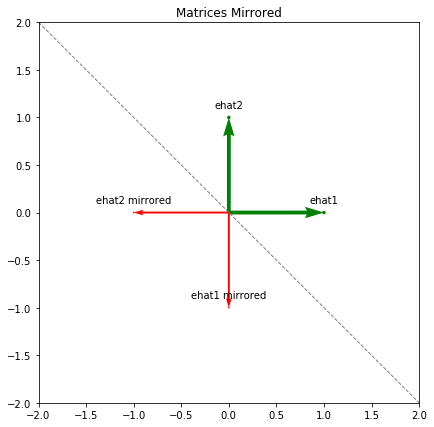

In [29]:
plt.figure(figsize=(7,7))

ax = plt.gca()
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_aspect('equal')

add_quiver(ehat[0, 0], ehat[0, 1], 'ehat1', 'g', width=0.01)
add_quiver(ehat[1, 0], ehat[1, 1], 'ehat2', 'g', width=0.01)
add_quiver(ehat_mirrored[0, 0], ehat_mirrored[0, 1], 'ehat1 mirrored', 'r',)
add_quiver(ehat_mirrored[1, 0], ehat_mirrored[1, 1], 'ehat2 mirrored', 'r')

line = Line2D([-2, 2], [2, -2], linewidth=1, linestyle = "--", color="grey")
ax.add_line(line)

plt.title('Matrices Mirrored')
plt.show()

In [30]:
ehat = np.array([[1., 0.],
                [0., 1.]])
S = np.array([[-1., 0.],
              [0., 1.]])
ehat_mirrored = np.dot(S, ehat)

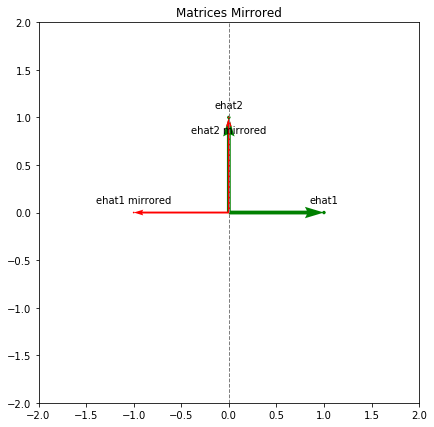

In [31]:
plt.figure(figsize=(7,7))

ax = plt.gca()
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_aspect('equal')

add_quiver(ehat[0, 0], ehat[0, 1], 'ehat1', 'g', width=0.01)
add_quiver(ehat[1, 0], ehat[1, 1], 'ehat2', 'g', width=0.01)
add_quiver(ehat_mirrored[0, 0], ehat_mirrored[0, 1], 'ehat1 mirrored', 'r',)
add_quiver(ehat_mirrored[1, 0], ehat_mirrored[1, 1], 'ehat2 mirrored', 'r', labelpos='S')

line = Line2D([0, 0], [-2, 2], linewidth=1, linestyle = "--", color="grey")
ax.add_line(line)

plt.title('Matrices Mirrored')
plt.show()

In [32]:
ehat = np.array([[1., 0.],
                [0., 1.]])
S = np.array([[1., 0.],
              [0., -1.]])
ehat_mirrored = np.dot(S, ehat)

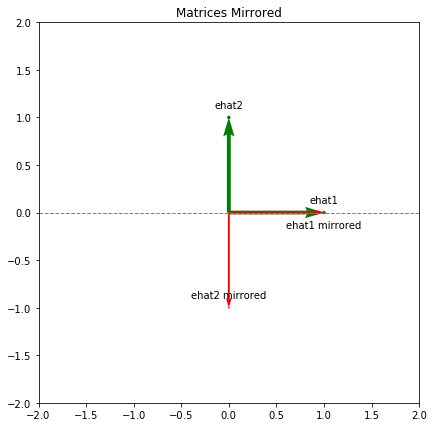

In [33]:
plt.figure(figsize=(7,7))

ax = plt.gca()
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_aspect('equal')

add_quiver(ehat[0, 0], ehat[0, 1], 'ehat1', 'g', width=0.01)
add_quiver(ehat[1, 0], ehat[1, 1], 'ehat2', 'g', width=0.01)
add_quiver(ehat_mirrored[0, 0], ehat_mirrored[0, 1], 'ehat1 mirrored', 'r', labelpos='S')
add_quiver(ehat_mirrored[1, 0], ehat_mirrored[1, 1], 'ehat2 mirrored', 'r')

line = Line2D([-2, 2], [0, 0], linewidth=1, linestyle = "--", color="grey")
ax.add_line(line)

plt.title('Matrices Mirrored')
plt.show()

And now for an animated version:

<IPython.core.display.Javascript object>


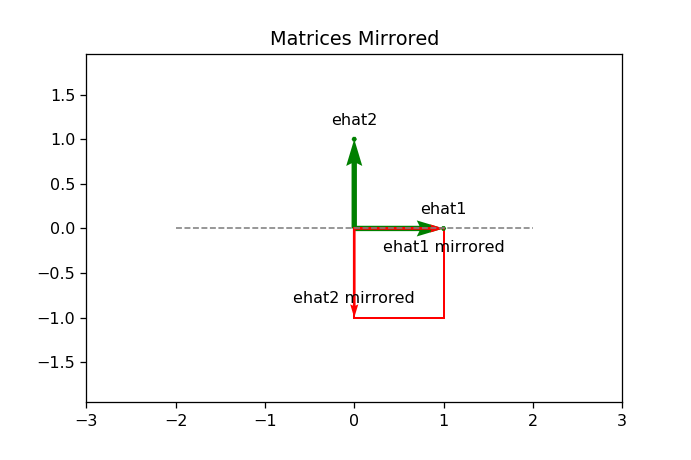

In [35]:
%matplotlib notebook

fig = plt.figure()
plt.axis('equal')
ax = fig.add_subplot(111)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

add_quiver(ehat[0, 0], ehat[0, 1], 'ehat1', 'g', width=0.01)
add_quiver(ehat[1, 0], ehat[1, 1], 'ehat2', 'g', width=0.01)
add_quiver(ehat_mirrored[0, 0], ehat_mirrored[1, 0], 'ehat1 mirrored', 'r', labelpos='S')
add_quiver(ehat_mirrored[1, 0], ehat_mirrored[1, 1], 'ehat2 mirrored', 'r')

line = Line2D([-2, 2], [0, 0], linewidth=1, linestyle = "--", color="grey")
ax.add_line(line)

widths = [1, np.dot(np.array([[1, 1]]),S)[0, 0]]
heights = [1, np.dot(np.array([[1, 1]]),S)[0, 1]]
patch = plt.Rectangle((0,0), width=1, height=1, color='g', fill=False)
def init():
    ax.add_patch(patch)
    return patch,

def animate(i):
    patch.set_width(widths[i])
    patch.set_height(heights[i])
    if i == 0:
        c = 'g'
        patch.set_color(c)
    else:
        c = 'r'
        patch.set_color(c)
    return patch,

anim = animation.FuncAnimation(fig, animate,
                               init_func=init,
                               frames=len(widths),
                               interval=1000,
                               blit=True)
plt.title('Matrices Mirrored')
plt.show()

### Sheering

In [314]:
ehat = np.array([[1., 0.],
                [0., 1.]])
S = np.array([[1., 1.],
              [1., 0.]])
ehat_sheered = np.dot(S, ehat)

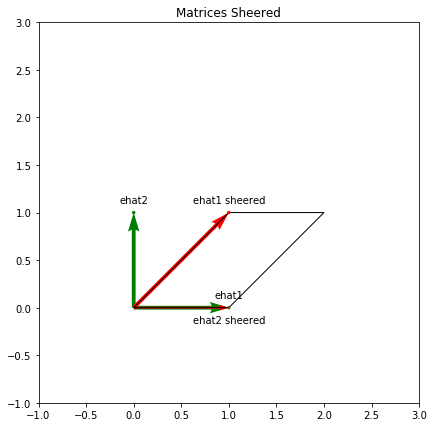

In [325]:
%matplotlib inline
plt.figure(figsize=(7,7))

ax = plt.gca()
ax.set_xlim([-1, 3])
ax.set_ylim([-1, 3])
ax.set_aspect('equal')

add_quiver(ehat[0, 0], ehat[0, 1], 'ehat1', 'g', width=0.01)
add_quiver(ehat[1, 0], ehat[1, 1], 'ehat2', 'g', width=0.01)
add_quiver(ehat_sheered[0, 0], ehat_sheered[0, 1], 'ehat1 sheered', 'r', width=0.01)
add_quiver(ehat_sheered[1, 0], ehat_sheered[1, 1], 'ehat2 sheered', 'r', labelpos='S')

x = [0, 1, 2, 1]
y = [0, 1, 1, 0]
ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=False))

plt.title('Matrices Sheered')
plt.show()

### Rotating

In [37]:
ehat = np.array([[1., 0.],
                 [0., 1.]])
S = np.array([[0., -1.],
              [1., 0.]])
ehat_rotated = np.dot(S, ehat)

In [38]:
ehat_rotated

array([[ 0., -1.],
       [ 1.,  0.]])

<IPython.core.display.Javascript object>


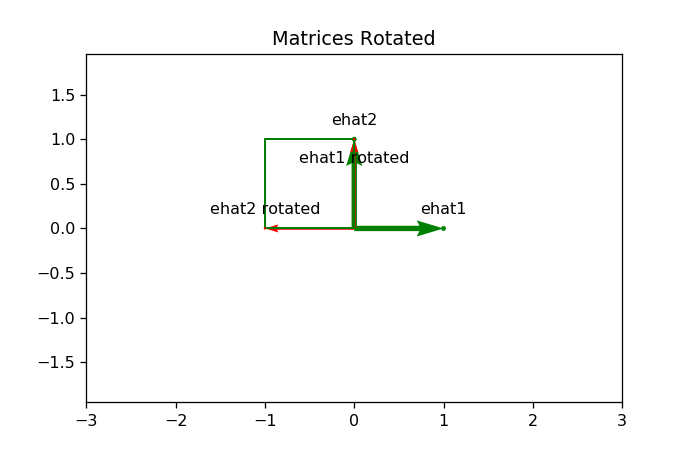

In [49]:
%matplotlib notebook

fig = plt.figure()
plt.axis('equal')
ax = fig.add_subplot(111)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

add_quiver(ehat[0, 0], ehat[0, 1], 'ehat1', 'g', width=0.01)
add_quiver(ehat[1, 0], ehat[1, 1], 'ehat2', 'g', width=0.01)
add_quiver(ehat_rotated[0, 0], ehat_rotated[1, 0], 'ehat1 rotated', 'r', labelpos='S')
add_quiver(ehat_rotated[0, 1], ehat_rotated[1, 1], 'ehat2 rotated', 'r')

x = [0, 0, 0]
y = [0, 0, 0]
rotation = [0, 45, 90]
patch = plt.Rectangle((0,0), width=1, height=1, color='g', fill=False)
def init():
    ax.add_patch(patch)
    return patch,
def animate(i):
    patch.set_xy([x[i], y[i]])
    patch._angle = rotation[i]
    return patch,
anim = animation.FuncAnimation(fig, animate,
                               init_func=init,
                               frames=len(rotation),
                               interval=1000,
                               blit=True)


plt.title('Matrices Rotated')
plt.show()

In general, to rotate $\theta$ degrees:

$\begin{bmatrix} cos\theta & sin\theta 
              \\ -sin\theta & cos\theta\end{bmatrix}$

In [97]:
theta = -90
cos_theta = round(math.cos(math.radians(theta)),2)
sin_theta = round(math.sin(math.radians(theta)),2)
np.array([[cos_theta, sin_theta],
          [-sin_theta, cos_theta]])

array([[0, -1],
       [1, 0]])

In [99]:
theta = 30
cos_theta = round(math.cos(math.radians(theta)),2)
sin_theta = round(math.sin(math.radians(theta)),2)
np.array([[cos_theta, sin_theta],
          [-sin_theta, cos_theta]])

array([[87/100, 1/2],
       [-1/2, 87/100]])

## Inverse

The inverse of A reverses exactly whatever A does and returns just the identity. 
So, if I take this equation 
$$Ar = S$$ 
and multiply it on both sides with the inverse of A
$$A^{-1}Ar = A^{-1}S$$
The A and A inverse on the left cancel each other out and we are left with:
$$r = A^{-1}S$$

### Gaussian elimination

Take the following equality:

$\begin{bmatrix} 1 & 1 & 3
              \\ 1 & 2 & 4
              \\ 1 & 1 & 2\end{bmatrix}$ 
$\begin{bmatrix} a 
              \\ b
              \\ c\end{bmatrix}$ =
$\begin{bmatrix} 15 
              \\ 21
              \\ 13\end{bmatrix}$

As part of the <b><u>elimination</u></b> process, let's deduct row 1 from row 2 and 2:

$\begin{bmatrix} 1 & 1 & 3
              \\ 0 & 1 & 1
              \\ 0 & 0 & -1\end{bmatrix}$ 
$\begin{bmatrix} a 
              \\ b
              \\ c\end{bmatrix}$ =
$\begin{bmatrix} 15 
              \\  6
              \\ -2\end{bmatrix}$

Let's multiply the 3rd row by -1:

$\begin{bmatrix} 1 & 1 & 3
              \\ 0 & 1 & 1
              \\ 0 & 0 & 1\end{bmatrix}$ 
$\begin{bmatrix} a 
              \\ b
              \\ c\end{bmatrix}$ =
$\begin{bmatrix} 15 
              \\  6
              \\  2\end{bmatrix}$


<font color='red'> We now have a solution now for c: c is equal to 2. </font>

A is now what is called a triangular matrix, that is, everything below the body diagonal is zero. We have reduced it to its Echelon form. 

Now, we can do what's called <b><u>back substitution</u></b>. We can take the answer for c and substitute it into the first two rows:
Let's multiply the 3rd row by -1:

$\begin{bmatrix} 1 & 1 & 0
              \\ 0 & 1 & 0
              \\ 0 & 0 & 1\end{bmatrix}$ 
$\begin{bmatrix} a 
              \\ b
              \\ c\end{bmatrix}$ =
$\begin{bmatrix}  9 
              \\  4
              \\  2\end{bmatrix}$
              
<font color='red'> We now also have an answer for b: b is equal to 4.</font>

We can now also take the answer for b and substitute it into the first row:

$\begin{bmatrix} 1 & 0 & 0
              \\ 0 & 1 & 0
              \\ 0 & 0 & 1\end{bmatrix}$ 
$\begin{bmatrix} a 
              \\ b
              \\ c\end{bmatrix}$ =
$\begin{bmatrix}  5 
              \\  4
              \\  2\end{bmatrix}$
<p>
<font color='red'> We now also have an answer for a: a is equal to 5. </font>

Note that, in following the method above, we ended up with the <b><u>Identity Matrix</u></b> on the left side.

## Determinants and Inverses

In [215]:
ehat = np.array([[1., 0.],
                 [0., 1.]])
a = 1.5
b = 0
c = 0
d = 2.
S = np.array([[a, b],
              [c, d]])
ehat_sheered = np.dot(S, ehat)

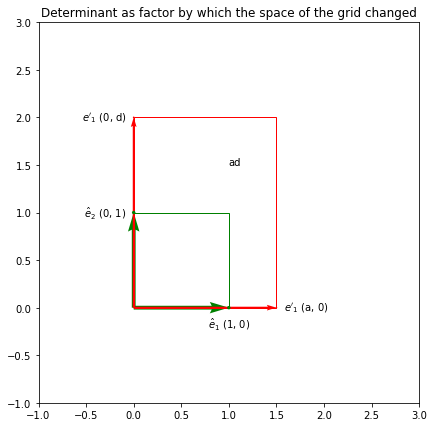

In [216]:
%matplotlib inline
plt.figure(figsize=(7,7))

ax = plt.gca()
ax.set_xlim([-1, 3])
ax.set_ylim([-1, 3])
ax.set_aspect('equal')

add_quiver(ehat[0, 0], ehat[0, 1], '$\hat{e}_1$ (1, 0)', 'g', width=0.01, labelpos='S')
add_quiver(ehat[1, 0], ehat[1, 1], '$\hat{e}_2$ (0, 1)', 'g', width=0.01, labelpos='W')
add_quiver(ehat_sheered[0, 0], ehat_sheered[1, 0], "$e'_1$ (a, 0)", 'r', labelpos='E')
add_quiver(ehat_sheered[0, 1], ehat_sheered[1, 1], "$e'_1$ (0, d)", 'r', labelpos='W')

x = [ehat[0, 1], ehat[0, 1], ehat[0, 0], ehat[0, 0]]
y = [ehat[1, 0], ehat[1, 1], ehat[1, 1], ehat[1, 0]]
ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=False, color='g'))

x = [0, S[0, 1], S[0, 1] + a, S[0, 0]]
y = [0, S[1, 1], S[1, 1] + c, S[1, 0]]
ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=False, color='r'))

ax.text(1., 1.5, 'ad')

plt.title('Determinant as factor by which the space of the grid changed')
plt.show()

The determinant of:
$\begin{bmatrix} a & b 
              \\ 0 & d \end{bmatrix}$ = ad

In [217]:
ehat = np.array([[1., 0.],
                 [0., 1.]])
a = 1.5
b = 0.5
c = 0
d = 2.
S = np.array([[a,  b],
              [c, d]])
ehat_sheered = np.dot(S, ehat)

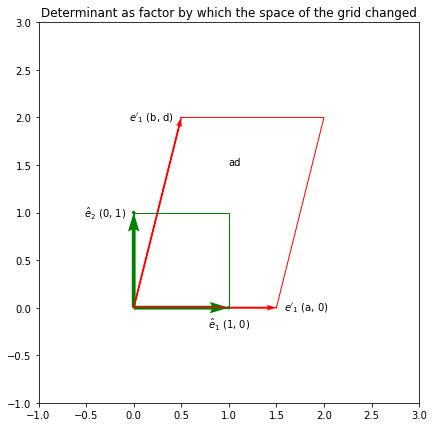

In [218]:
%matplotlib inline
plt.figure(figsize=(7,7))

ax = plt.gca()
ax.set_xlim([-1, 3])
ax.set_ylim([-1, 3])
ax.set_aspect('equal')

add_quiver(ehat[0, 0], ehat[0, 1], '$\hat{e}_1$ (1, 0)', 'g', width=0.01, labelpos='S')
add_quiver(ehat[1, 0], ehat[1, 1], '$\hat{e}_2$ (0, 1)', 'g', width=0.01, labelpos='W')
add_quiver(ehat_sheered[0, 0], ehat_sheered[1, 0], "$e'_1$ (a, 0)", 'r', labelpos='E')
add_quiver(ehat_sheered[0, 1], ehat_sheered[1, 1], "$e'_1$ (b, d)", 'r', labelpos='W')

x = [ehat[0, 1], ehat[0, 1], ehat[0, 0], ehat[0, 0]]
y = [ehat[1, 0], ehat[1, 1], ehat[1, 1], ehat[1, 0]]
ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=False, color='g'))

x = [0, S[0, 1], S[0, 1] + a, S[0, 0]]
y = [0, S[1, 1], S[1, 1] + c, S[1, 0]]
ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=False, color='r'))

ax.text(1., 1.5, 'ad')

plt.title('Determinant as factor by which the space of the grid changed')
plt.show()

The determinant of:
$\begin{bmatrix} a & b 
              \\ 0 & d \end{bmatrix}$ = ad

In [229]:
ehat = np.array([[1., 0.],
                 [0., 1.]])
a = 1.5
b = 0.7
d = 2.
c = 0.2
S = np.array([[a,  b],
              [c, d]])
ehat_sheered = np.dot(S, ehat)

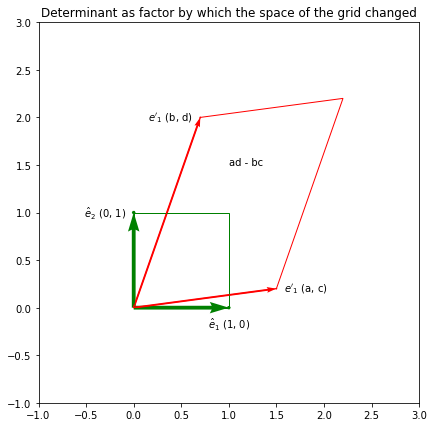

In [230]:
%matplotlib inline
plt.figure(figsize=(7,7))

ax = plt.gca()
ax.set_xlim([-1, 3])
ax.set_ylim([-1, 3])
ax.set_aspect('equal')

add_quiver(ehat[0, 0], ehat[0, 1], '$\hat{e}_1$ (1, 0)', 'g', width=0.01, labelpos='S')
add_quiver(ehat[1, 0], ehat[1, 1], '$\hat{e}_2$ (0, 1)', 'g', width=0.01, labelpos='W')
add_quiver(ehat_sheered[0, 0], ehat_sheered[1, 0], "$e'_1$ (a, c)", 'r', labelpos='E')
add_quiver(ehat_sheered[0, 1], ehat_sheered[1, 1], "$e'_1$ (b, d)", 'r', labelpos='W')

x = [ehat[0, 1], ehat[0, 1], ehat[0, 0], ehat[0, 0]]
y = [ehat[1, 0], ehat[1, 1], ehat[1, 1], ehat[1, 0]]
ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=False, color='g'))

x = [0, S[0, 1], S[0, 1] + a, S[0, 0]]
y = [0, S[1, 1], S[1, 1] + c, S[1, 0]]
ax.add_patch(patches.Polygon(xy=list(zip(x,y)), fill=False, color='r'))

ax.text(1., 1.5, 'ad - bc')

plt.title('Determinant as factor by which the space of the grid changed')
plt.show()

The determinant of:
$\begin{bmatrix} a & b 
              \\ c & d \end{bmatrix}$ = ad - bc